In [3]:
# Classification Project: Sonar rocks or mines

# Load libraries

import pandas as pd
from matplotlib import pyplot
 
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [9]:
import numpy as np

In [4]:
# Load dataset
 
df = pd.read_csv('train.csv')


In [5]:
 # Summarize Data

# Descriptive statistics
# shape
print(df.shape)

(29451, 12)


In [6]:
# types
set_option('display.max_rows', 500)
print(df.dtypes)

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object


In [7]:
# head
set_option('display.width', 100)
print(df.head(20))

   POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  READY_TO_MOVE  RESALE  \
0      Owner                   0     0        2       BHK  1300.236407              1       1   
1     Dealer                   0     0        2       BHK  1275.000000              1       1   
2      Owner                   0     0        2       BHK   933.159722              1       1   
3      Owner                   0     1        2       BHK   929.921143              1       1   
4     Dealer                   1     0        2       BHK   999.009247              0       1   
5      Owner                   0     0        3       BHK  1250.000000              1       1   
6     Dealer                   0     0        3       BHK  1495.053957              1       1   
7      Owner                   0     1        3       BHK  1181.012946              1       1   
8     Dealer                   0     1        2       BHK  1040.000000              1       1   
9      Owner                  

# Exploration des données 

**POSTED_BY** : Marquage de catégorie qui a répertorié la propriété

**UNDER_CONSTRUCTION** : En construction ou non

**RERA** : Rera approuvé ou non

**BHK_NO** : nombre de chambres

**BHKORRK** : type de propriété

**SQUARE_FT** : Superficie totale de la maison en pieds carrés

**READYTOMOVE** : Marquage de catégorie Ready to move or Not

**REVENTE** : Marquage catégorie Revente ou non

**ADRESSE** : Adresse du bien

**LONGITUDE** : Longitude de la propriété

**LATITUDE** : Latitude de la propriété

In [10]:
print("le prix moyen proposé par le propiétaire est : {}".format(np.mean(df[(df['POSTED_BY'] == 'Owner')]['TARGET(PRICE_IN_LACS)'])))
print("le prix moyen proposé par le marchand est: {}".format(np.mean(df[(df['POSTED_BY'] == 'Dealer')]['TARGET(PRICE_IN_LACS)'])))
print("le prix moyen proposé par le constructeur est: {}".format(np.mean(df[(df['POSTED_BY'] == 'Builder')]['TARGET(PRICE_IN_LACS)'])))

le prix moyen proposé par le propiétaire est : 60.67426361738482
le prix moyen proposé par le marchand est: 186.77473456891204
le prix moyen proposé par le constructeur est: 245.70562700964607


In [11]:
df["ADDRESS"]


0                    Ksfc Layout,Bangalore
1                Vishweshwara Nagar,Mysore
2                         Jigani,Bangalore
3              Sector-1 Vaishali,Ghaziabad
4                         New Town,Kolkata
                       ...                
29446                 Shamshabad Road,Agra
29447    E3-108, Lake View Recidency,,Vapi
29448                    Ajmer Road,Jaipur
29449               Sholinganallur,Chennai
29450                     Jagatpura,Jaipur
Name: ADDRESS, Length: 29451, dtype: object

In [12]:

print(df.groupby('ADDRESS').size()) # 

ADDRESS
, panvel,Mumbai                                            1
,Manoramaganj,Indore                                       1
100 Feet Road,Anand                                        1
101,yamuna Complex, Gokul Vihar Society,nh-8, Vapi,Vapi    1
150 Feet Ring Road,Rajkot                                  2
                                                          ..
virar,Palghar                                              1
vishakoderu,Bhimavaram                                     1
walkeshwari nagari,Jamnagar                                1
west mambalam,Chennai                                      1
yelahanka/Jakkur,Bangalore                                 1
Length: 6899, dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
Label = LabelEncoder() 

In [15]:
# transformation en quantitative 

df['POSTED_BY'] = Label.fit_transform(df['POSTED_BY'])    
df['BHK_OR_RK'] = Label.fit_transform(df['BHK_OR_RK'])
df['ADDRESS'] = Label.fit_transform(df['ADDRESS'])

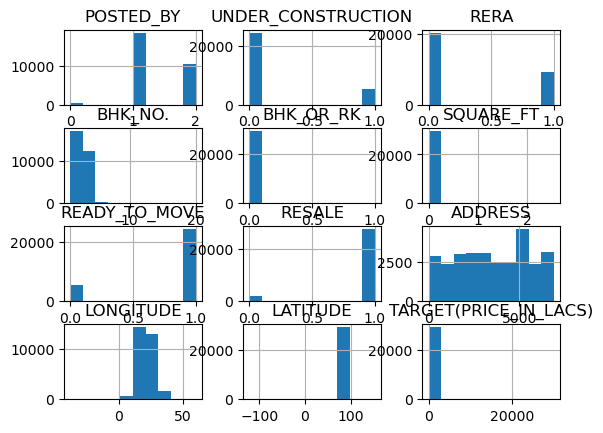

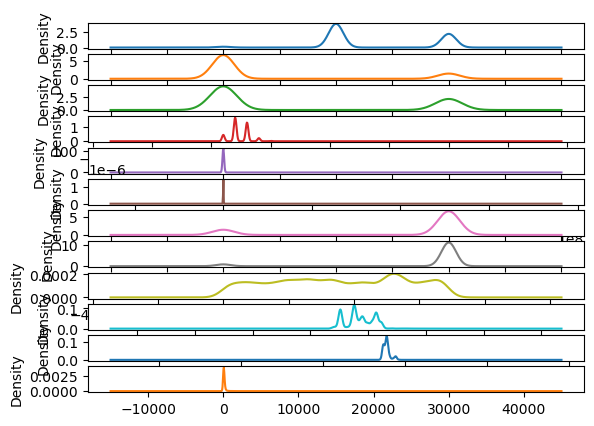

In [16]:
# Data visualizations

# histograms
df.hist()
pyplot.show()
# density
df.plot(kind='density', subplots=True, sharex=False, legend=False)
pyplot.show()
# box and whisker plots
#dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
#pyplot.show()


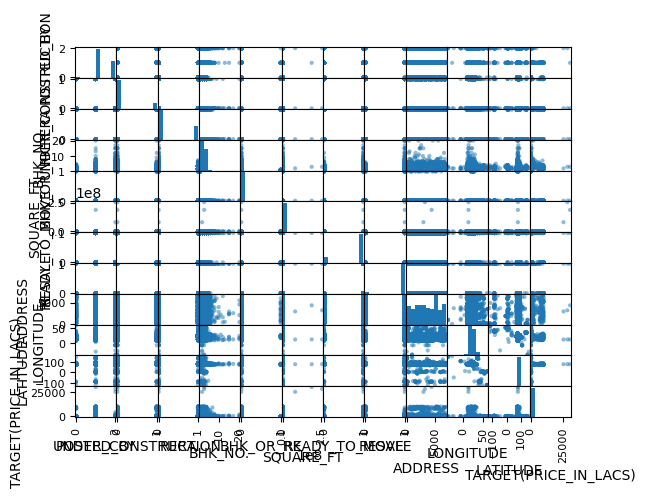

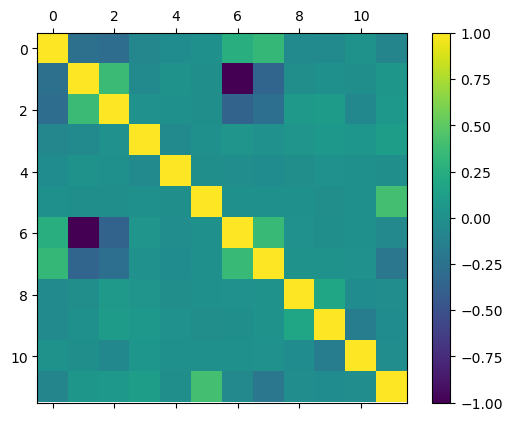

In [17]:
# scatter plot matrix
scatter_matrix(df)
pyplot.show()
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [18]:
# Prepare Data

# Split-out validation dataset
array = df.values
X = array[:,0:10].astype(float)
Y = array[:,11]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [19]:
 # Evaluate Algorithms

# Test options and evaluation metric
 
num_folds = 10
seed = 7
scoring = 'r2'
 

In [20]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('SVM', SVR()))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -0.078231 (0.525366)
KNN: 0.705135 (0.154821)
CART: 0.882432 (0.137485)


on remarque que CART donne un meilleur résultat

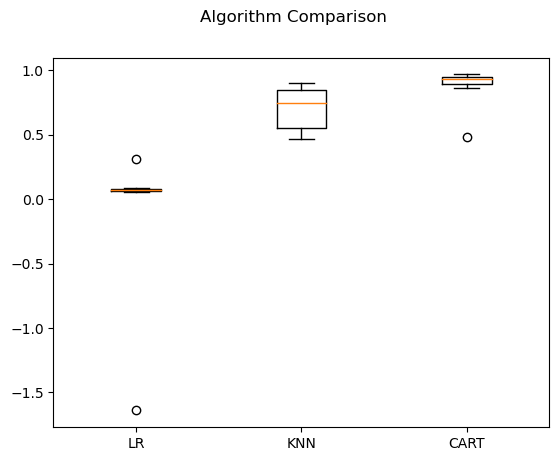

In [21]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [22]:
# la normalisation 
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',   LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
#pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.015171 (0.248877)
ScaledKNN: 0.144688 (0.100816)
ScaledCART: 0.865580 (0.132315)


ici on remarque que la normalisation n'est pas efficace, surtout  sur le knn

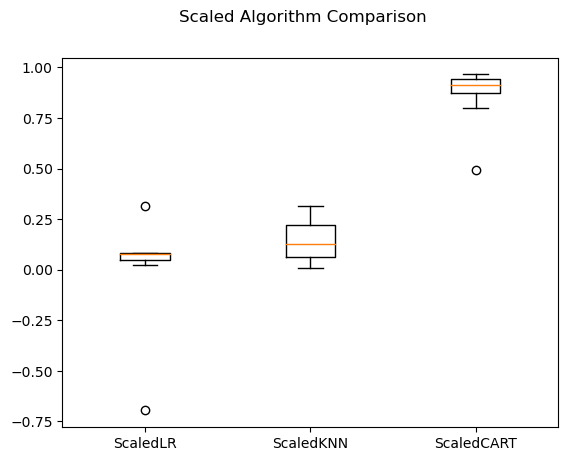

In [23]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [24]:
# trouvons la meilleur valeur des hyperp # pas apres la normalisation vu que on avait de meilleurs résultat sans . 
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds,  random_state=seed ,shuffle = True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.793722 using {'n_neighbors': 1}
0.793722 (0.126316) with: {'n_neighbors': 1}
0.785234 (0.123991) with: {'n_neighbors': 3}
0.767070 (0.115473) with: {'n_neighbors': 5}
0.768227 (0.106650) with: {'n_neighbors': 7}
0.778345 (0.099233) with: {'n_neighbors': 9}
0.776926 (0.101170) with: {'n_neighbors': 11}
0.771129 (0.109813) with: {'n_neighbors': 13}
0.771574 (0.107791) with: {'n_neighbors': 15}
0.771878 (0.106915) with: {'n_neighbors': 17}
0.771310 (0.106598) with: {'n_neighbors': 19}
0.772454 (0.105318) with: {'n_neighbors': 21}


pour k=1 on a le meilleur résultat

In [25]:
# ensembles( methodes ensemblistes)
ensembles = []
ensembles.append(('AB', AdaBoostRegressor()))
ensembles.append(('GBM', GradientBoostingRegressor()))
ensembles.append(('RF', RandomForestRegressor()))
ensembles.append(('ET', ExtraTreesRegressor()))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds,  random_state=seed ,shuffle = True)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.813960 (0.127618)
GBM: 0.905081 (0.116839)
RF: 0.914835 (0.116816)
ET: 0.944028 (0.032184)


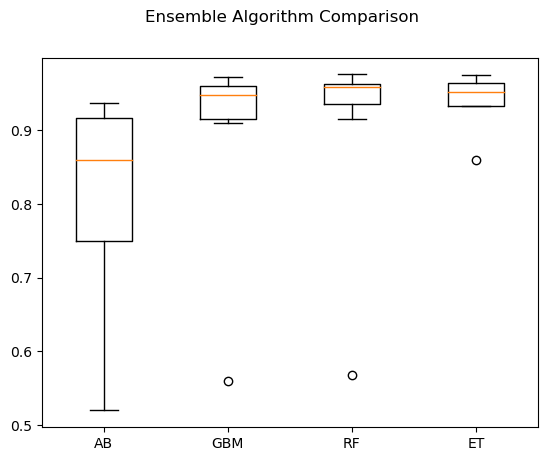

In [26]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Extra Trees Regressor est le plus performant

# Partie Test

on peut appliquer le random frest regressor(91%) ou Extra Trees Regressor(94%) car sont les meilleurs 

In [27]:
#notre jeu test
dataset1 = pd.read_csv('test.csv')


In [28]:
dataset1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [29]:

# transformation en quantitative 

dataset1['POSTED_BY'] = Label.fit_transform(dataset1['POSTED_BY'])    
dataset1['BHK_OR_RK'] = Label.fit_transform(dataset1['BHK_OR_RK'])
dataset1['ADDRESS'] = Label.fit_transform(dataset1['ADDRESS'])


In [30]:
# Prepare Data

# Split-out validation dataset1
array1 = dataset1.values
X1 = array1[:,0:10].astype(float)
X1.shape



(68720, 10)

In [31]:
# Finalize Model
model =RandomForestRegressor() 
model.fit(X,Y)



RandomForestRegressor()

In [32]:
pred=model.predict(X1)
pred.shape

(68720,)

In [33]:
score_test=cross_val_score(model,X1,pred)

In [34]:

score_test #

array([0.99649211, 0.99588961, 0.99250064, 0.99311907, 0.986451  ])

In [35]:
print(np.mean(score_test)) # la moyenne des scores est 99% qui est un résultat super!

0.9928904858893336


In [36]:
# POUR EXTRA TREE REGRESSOR 

model1 =ExtraTreesRegressor() 
model1.fit(X,Y)
pred=model1.predict(X1)
pred.shape
score_test=cross_val_score(model1,X1,pred)
score_test
 

array([0.99670404, 0.99276503, 0.99370202, 0.97119537, 0.99649073])

In [37]:
print(np.mean(score_test)) # 

0.9901714390414937
